# Rafael Espinosa Mena
rafaelespinosa4158@gmail.com\
February 2020\
Diabetes KNN Predictor

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import matplotlib.pyplot as plt

In [2]:
# Read dataset into data-frame
col_names = ["pregnant", "glucose", "bp", "skin", "insulin", "bmi", "pedigree", "age", "label"]
diabetes_knn = pd.read_csv ('diabetes.csv',
                            header=0, names=col_names)
pd.set_option("display.max_columns", None)

In [3]:
# Determine dimensions of knn_diabetes
print("Dimension of knn_diabetes is", diabetes_knn.ndim)
print("Shape of knn_diabetes is", diabetes_knn.shape)

Dimension of knn_diabetes is 2
Shape of knn_diabetes is (768, 9)


In [4]:
# Account for missing values
diabetes_knn['skin'] = diabetes_knn['skin'].fillna(diabetes_knn['skin'].median())
diabetes_knn['bmi'] = diabetes_knn['bmi'].fillna(diabetes_knn['bmi'].median())
diabetes_knn['glucose'] = diabetes_knn['glucose'].fillna(diabetes_knn['glucose'].median())
diabetes_knn['bp'] = diabetes_knn['bp'].fillna(diabetes_knn['bp'].median())

In [5]:
# Create feature matrix and target vector
feature_cols = ["pregnant", "insulin", "bmi", "age", "glucose", "bp", "pedigree", "skin"]
X = diabetes_knn[feature_cols] # Feature matrix
Y = diabetes_knn["label"] # Target Vector

In [6]:
# Standardize features col
norm = StandardScaler()
X = pd.DataFrame(norm.fit_transform(X), columns=X.columns)

In [7]:
# Split Feature Matrix
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2,
                                                    random_state = 2021, stratify=Y)
X_trainA, X_trainB, Y_trainA, Y_trainB = train_test_split(X_train, Y_train, test_size=0.25,
                                                          random_state=2021, stratify=Y_train)

In [8]:
# Fit a model and compute accuracy
neighbors = np.arange(1, 31)
train_accuracy = np.empty(30)
test_accuracy = np.empty(30)

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_trainA, Y_trainA)
    y_pred = knn.predict(X_trainB)
    cf = metrics.confusion_matrix(Y_trainB, y_pred)
    train_accuracy[k-1] = knn.score(X_trainA, Y_trainA)
    test_accuracy[k-1] = knn.score(X_trainB, Y_trainB)

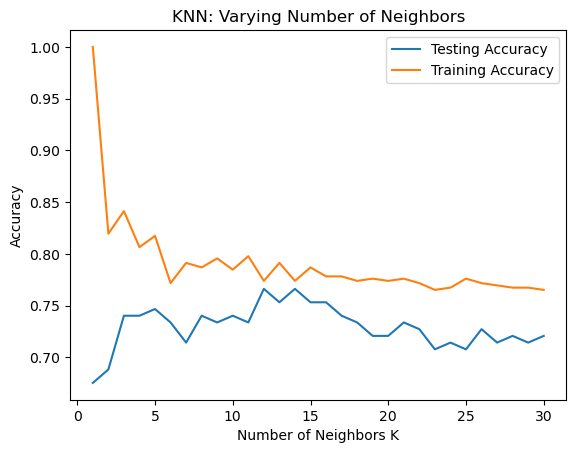

In [9]:
# Plot a graph of training A and training B accuracy.
plt.figure(2)
plt.title("KNN: Varying Number of Neighbors")
plt.plot(neighbors, test_accuracy, label="Testing Accuracy")
plt.plot(neighbors, train_accuracy, label="Training Accuracy")
plt.legend()
plt.xlabel("Number of Neighbors K")
plt.ylabel("Accuracy")
plt.show()

In [10]:
# Score data set
k = 10 # This is my chosen value for k
knn = KNeighborsClassifier(n_neighbors = k)
knn.fit(X_trainA, Y_trainA)
y_pred = knn.predict(X_test)
train_accuracy = knn.score(X_trainA, Y_trainA)
test_accuracy = knn.score(X_test, Y_test)
print("Train Accuracy: ", train_accuracy)
print("Test Accuracy: ", test_accuracy)

Train Accuracy:  0.7847826086956522
Test Accuracy:  0.7337662337662337


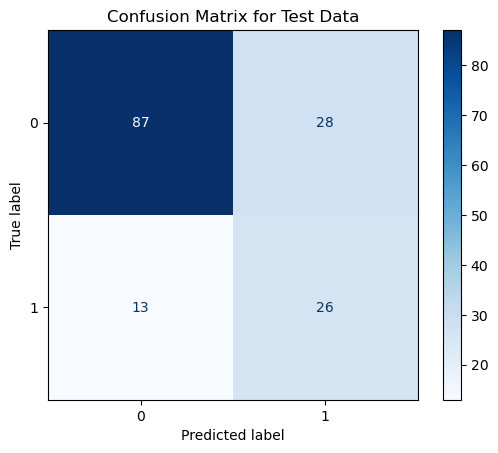

In [11]:
# Plot the confusion matrix
cm = metrics.confusion_matrix(y_pred, Y_test)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Test Data")
plt.show()

In [12]:
# Predict the outcome for a patient with these given measurements
d = {'pregnant': [2], 'insulin': [200], 'bmi': [30], 'age': [55], 'glucose': [150],
     'bp': [85], 'pedigree': [0.3], 'skin': [22]}
df = pd.DataFrame(data=d)
df_standarized = pd.DataFrame(norm.fit_transform(df), columns=df.columns)
predic = knn.predict(df_standarized)
print("Predicted Outcome:", predic)

Predicted Outcome: [0]
